In [43]:
# Import functions
from load_training_data import get_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
data = get_data('green_tripdata_summary_all')

Data fetched into DataFrame with 176559 rows.


In [32]:
data.head()

,trip_uid,vendor_label,trip_month,trip_quarter,trip_day,trip_weekday,day_type,trip_hour,payment_type_label,trip_type,...,avg_tip,avg_total,avg_passenger_count,unique_pickup_locations,first_trip,last_trip,peak_morning_hours,peak_evening_hours,trip_duration_minutes,tip_rate
0,f8881f1538553377be93d6127457f73b,VeriFone Inc.,12,4,3,4,Weekday,5,Cash,Long,...,0.00,19.05,2.0,3,2020-12-03 05:11:27,2020-12-03 05:58:32,0,0,25.93,0.00
1,a923dcde1eb35aaea278d5ca14f409a9,VeriFone Inc.,12,4,3,4,Weekday,5,Credit Card,Long,...,2.75,39.59,1.0,3,2020-12-03 05:31:46,2020-12-03 05:57:44,0,0,38.20,0.11
2,8fb4b636f67b60616070974493bc9db9,VeriFone Inc.,12,4,10,4,Weekday,5,Cash,Long,...,0.00,16.80,1.0,2,2020-12-10 05:04:56,2020-12-10 05:06:52,0,0,16.52,0.00
3,b272a5fbaca1caf6e8dc799d1d0fe50c,VeriFone Inc.,12,4,10,4,Weekday,5,Credit Card,Long,...,2.51,47.99,1.0,5,2020-12-10 05:14:22,2020-12-10 05:59:10,0,0,85.27,0.12
4,dd33c6da88bde3f0c0bb4ba62590e295,VeriFone Inc.,12,4,17,4,Weekday,5,Cash,Medium,...,0.00,11.80,1.0,1,2020-12-17 05:35:27,2020-12-17 05:35:27,0,0,13.45,0.00


## Data Exploration and Preprocessing

In [14]:
# Display the information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159654 entries, 0 to 159653
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trip_uid                 159654 non-null  object 
 1   vendor_label             159654 non-null  object 
 2   trip_month               159654 non-null  int64  
 3   trip_quarter             159654 non-null  int64  
 4   trip_day                 159654 non-null  int64  
 5   trip_weekday             159654 non-null  int64  
 6   day_type                 159654 non-null  object 
 7   trip_hour                159654 non-null  int64  
 8   payment_type_label       159654 non-null  object 
 9   trip_type                159654 non-null  object 
 10  trip_count               159654 non-null  int64  
 11  avg_distance             159654 non-null  float64
 12  total_distance           159654 non-null  float64
 13  avg_fare                 159654 non-null  float64
 14  tota

| Column Name             | Data Type | Description                                                                 |
|-------------------------|-----------|-----------------------------------------------------------------------------|
| vendor_label            | Text      | Labeled vendor name based on `VendorID` (e.g., 'Creative Mobile Technologies', 'VeriFone Inc.', or 'Other') |
| trip_month              | Integer   | Month extracted from `lpep_pickup_datetime`                                |
| trip_quarter            | Integer   | Quarter of the year extracted from `lpep_pickup_datetime`                  |
| trip_day                | Integer   | Day of the month extracted from `lpep_pickup_datetime`                     |
| trip_weekday            | Integer   | Day of the week (0=Sunday, 6=Saturday) from `lpep_pickup_datetime`         |
| day_type                | Text      | 'Weekday' or 'Weekend' based on the day of the week                        |
| trip_hour               | Integer   | Hour of the day extracted from `lpep_pickup_datetime`                      |
| payment_type_label      | Text      | Labeled payment type (e.g., 'Credit Card', 'Cash', etc.) based on `payment_type` |
| trip_type               | Text      | Trip category based on average distance: 'Short' (≤2 mi), 'Medium' (≤5 mi), 'Long' (>5 mi) |
| trip_count              | Integer   | Number of trips in the group                                               |
| avg_distance            | Numeric   | Average trip distance, rounded to 2 decimals                               |
| total_distance          | Numeric   | Total distance of trips in the group                                       |
| avg_fare                | Numeric   | Average fare amount, rounded to 2 decimals                                 |
| total_fare              | Numeric   | Total fare amount of trips in the group                                    |
| total_tip               | Numeric   | Total tip amount of trips in the group                                     |
| avg_tip                 | Numeric   | Average tip amount, rounded to 2 decimals                                  |
| avg_total               | Numeric   | Average total amount (fare + extras), rounded to 2 decimals                |
| avg_passenger_count     | Numeric   | Average number of passengers, rounded to 2 decimals                        |
| unique_pickup_locations | Integer   | Number of distinct pickup location IDs                                     |
| first_trip              | Timestamp | Earliest pickup datetime in the group                                      |
| last_trip               | Timestamp | Latest pickup datetime in the group                                        |
| peak_morning_hours      | Integer   | Number of trips during peak morning hours (6–9 AM)                         |
| peak_evening_hours      | Integer   | Number of trips during peak evening hours (5–7 PM)                         |
| trip_duration_minutes   | Numeric   | Maximum trip duration (in minutes), rounded to 2 decimals                  |
| tip_rate                | Numeric   | Average tip as a percentage of fare, rounded to 2 decimals                 |


In [15]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159654 entries, 0 to 159653
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   trip_uid                 159654 non-null  object 
 1   vendor_label             159654 non-null  object 
 2   trip_month               159654 non-null  int64  
 3   trip_quarter             159654 non-null  int64  
 4   trip_day                 159654 non-null  int64  
 5   trip_weekday             159654 non-null  int64  
 6   day_type                 159654 non-null  object 
 7   trip_hour                159654 non-null  int64  
 8   payment_type_label       159654 non-null  object 
 9   trip_type                159654 non-null  object 
 10  trip_count               159654 non-null  int64  
 11  avg_distance             159654 non-null  float64
 12  total_distance           159654 non-null  float64
 13  avg_fare                 159654 non-null  float64
 14  tota

In [45]:
# 1. Convert suitable object columns to category
object_cols = ['vendor_label', 'day_type', 'payment_type_label', 'trip_type']
for col in object_cols:
    data[col] = data[col].astype('category')

# 2. Downcast integer columns
int_cols = data.select_dtypes(include=['int64']).columns
data[int_cols] = data[int_cols].apply(pd.to_numeric, downcast='integer')

# 3. Downcast float columns
float_cols = data.select_dtypes(include=['float64']).columns
data[float_cols] = data[float_cols].apply(pd.to_numeric, downcast='float')

# 4. Drop unwanted columns (optional)
data.drop(columns=['first_trip', 'last_trip'], inplace=True)

# 5. Check memory usage after optimization
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176559 entries, 0 to 176558
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   trip_uid                 176559 non-null  object  
 1   vendor_label             176559 non-null  category
 2   trip_month               176559 non-null  int8    
 3   trip_quarter             176559 non-null  int8    
 4   trip_day                 176559 non-null  int8    
 5   trip_weekday             176559 non-null  int8    
 6   day_type                 176559 non-null  category
 7   trip_hour                176559 non-null  int8    
 8   payment_type_label       176559 non-null  category
 9   trip_type                176559 non-null  category
 10  trip_count               176559 non-null  int16   
 11  avg_distance             176559 non-null  float32 
 12  total_distance           176559 non-null  float64 
 13  avg_fare                 176559 non-null  fl

## Data Analysis

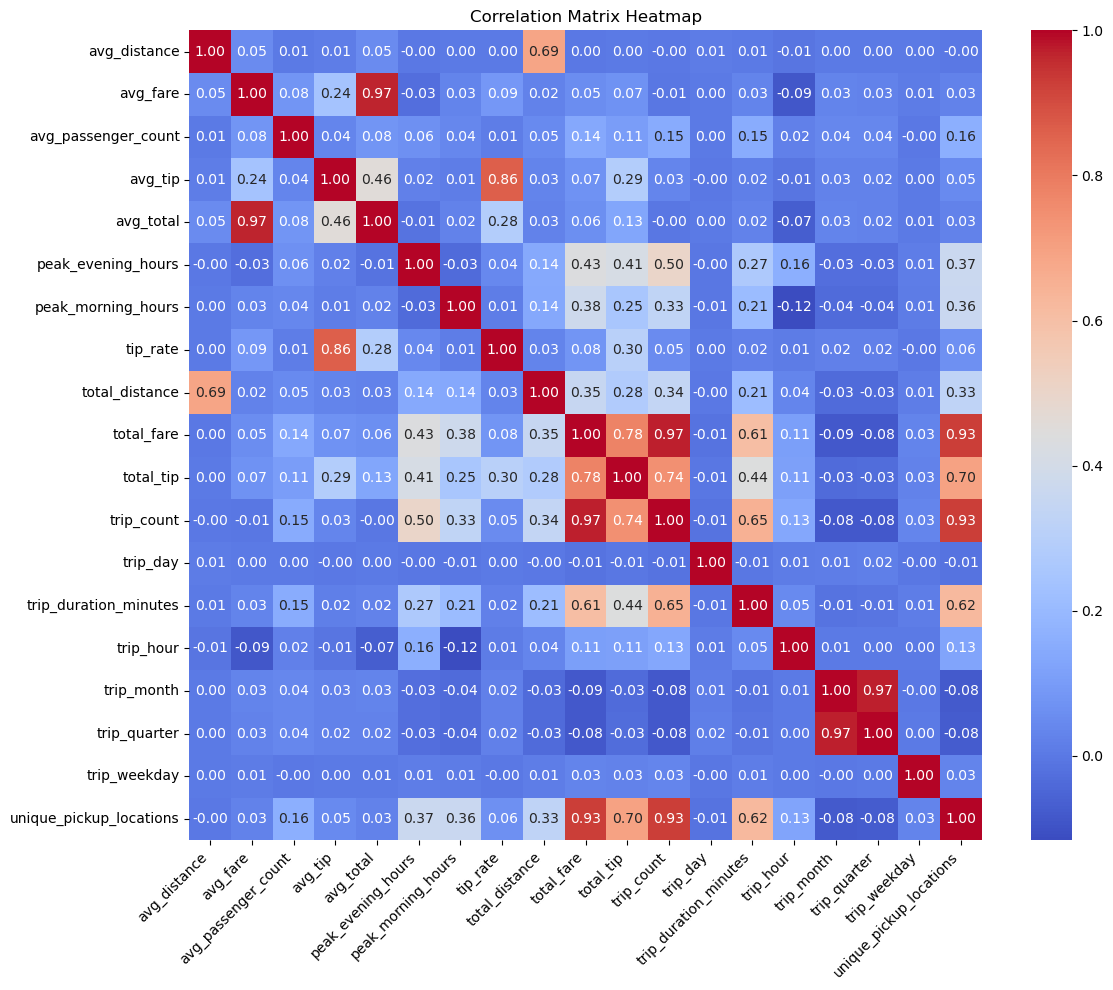

In [39]:
# Combine float and integer columns for correlation
numeric_cols = float_cols.union(int_cols)

# Compute correlation matrix
correlation_matrix = data[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with values annotated inside each square
sns.heatmap(
    correlation_matrix,
    annot=True,             # Display the correlation values in the squares
    cmap='coolwarm',       # Set the color map
    fmt='.2f',             # Format the numbers with two decimal places
    cbar=True,             # Show the color bar
    xticklabels=correlation_matrix.columns,  # Set x-axis labels
    yticklabels=correlation_matrix.columns,  # Set y-axis labels
    annot_kws={'size': 10}  # Optional: Adjust size of the text
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

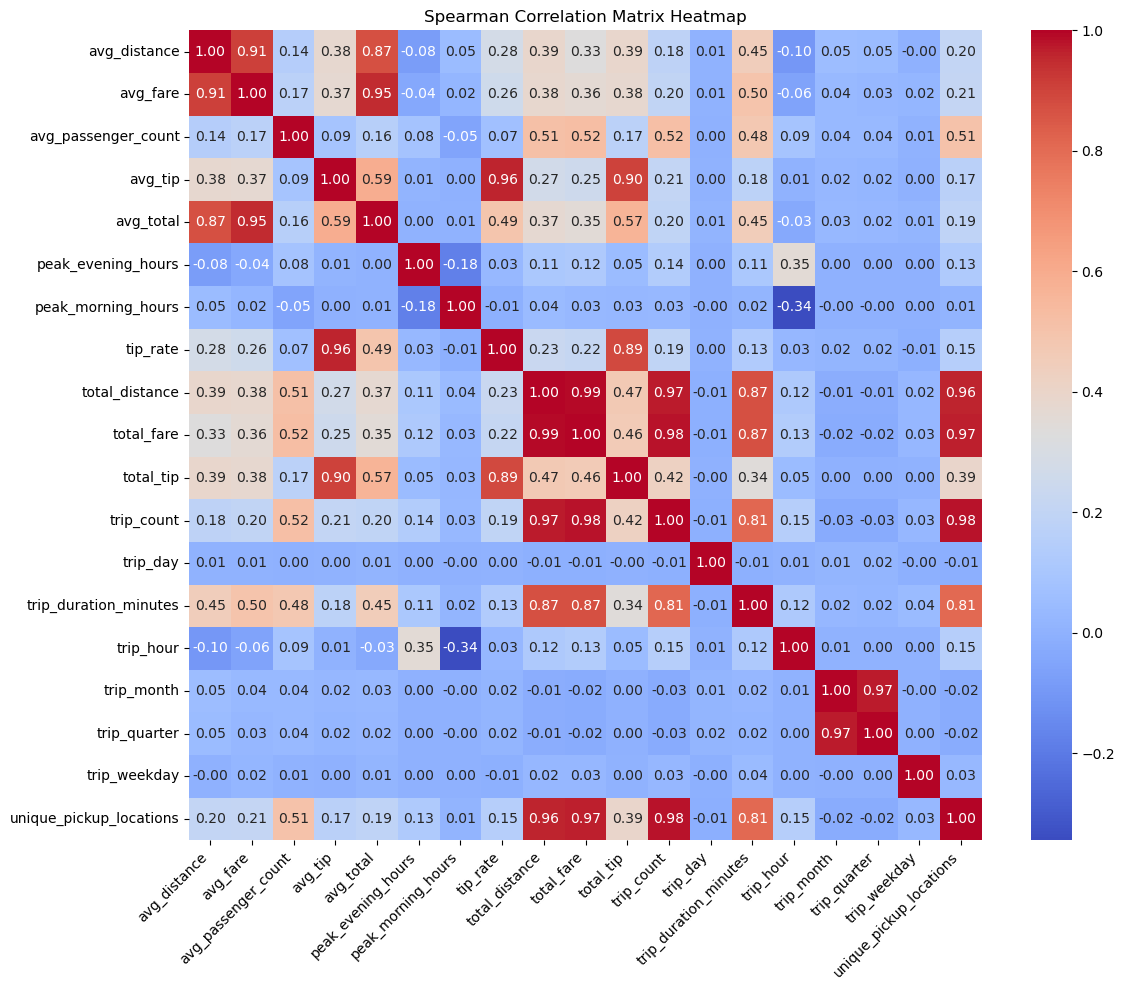

In [40]:
# Compute Spearman's correlation matrix
correlation_matrix_spearman = data[numeric_cols].corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap for Spearman correlation with values annotated inside each square
sns.heatmap(
    correlation_matrix_spearman,
    annot=True,             # Display the correlation values in the squares
    cmap='coolwarm',       # Set the color map
    fmt='.2f',             # Format the numbers with two decimal places
    cbar=True,             # Show the color bar
    xticklabels=correlation_matrix_spearman.columns,  # Set x-axis labels
    yticklabels=correlation_matrix_spearman.columns,  # Set y-axis labels
    annot_kws={'size': 10}  # Optional: Adjust size of the text
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title
plt.title('Spearman Correlation Matrix Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

del correlation_matrix_spearman, correlation_matrix, numeric_cols, int_cols, float_cols, object_cols, col

## Machine Learning Models
### ✅ Demand Prediction Model

- Objective: Predict trip_count (number of rides) given time and other features. This is a regression problem.

- 📦 Features (Inputs):
trip_month, trip_day, trip_weekday, trip_hour, day_type , vendor_label, payment_type_label, trip_type , avg_distance, avg_fare, avg_passenger_count, etc.

- 🎯 Target:
trip_count



In [46]:
from demand_model_trainer import split_data, encode_data, train_and_evaluate_model, train_on_full_data_and_save

In [47]:
# Define the target column
TARGET_COLUMN = 'trip_count'

# List of categorical columns
categorical_cols = ['vendor_label', 'payment_type_label', 'trip_type', 'day_type']

# List of features to be used for training
features = ['trip_month', 'trip_day', 'trip_weekday', 'trip_hour', 'day_type',
            'vendor_label', 'payment_type_label', 'trip_type',
            'avg_distance', 'avg_passenger_count','unique_pickup_locations']


# Split the data into training and testing sets
data = data[features + [TARGET_COLUMN]].copy()
X_train, X_test, y_train, y_test = split_data(data, TARGET_COLUMN)

In [48]:
# Preprocess the data
X_train_encoded, X_test_encoded = encode_data(X_train, X_test, categorical_cols, method='onehot')

In [49]:
# Train and evaluate Linear regression model
linear_regression = train_and_evaluate_model(X_train_encoded, X_test_encoded, y_train, y_test, model_name='linear_regression')

Model: linear_regression
CV RMSE: 34.59
Test RMSE: 34.73


In [50]:
# Train and evaluate decision tree model
decision_tree = train_and_evaluate_model(
    X_train_encoded,
    X_test_encoded,
    y_train,
    y_test,
    model_name='decision_tree',
    model_params={
    'max_depth': 5
    }
)

Model: decision_tree
CV RMSE: 21.10
Test RMSE: 21.15


In [38]:
# Train and evaluate xgboost model
xgboost_pipline  = train_and_evaluate_model(
    X_train_encoded,
    X_test_encoded,
    y_train,
    y_test,
    model_name='xgboost',
    model_params = {
    'learning_rate': 0.1,
    'max_depth': 4,
    'n_estimators': 3000,
    'subsample': 0.8,
    'random_state': 42,
    'device': 'cuda',      # <— GPU mode
    'verbosity':  2,       # <— Verbosity level
}
)

[19:50:13] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (107616, 15, 1614240).
[19:50:14] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.
[19:50:23] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (107616, 15, 1614240).
[19:50:23] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.
[19:50:31] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (107616, 15, 1614240).
[19:50:31] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.
[19:50:39] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (107616, 15, 1614240).
[19:50:39] INFO: C:\actions-runner\_work\xgbo

In [14]:
# train and evaluate catboost model
cat_boost = train_and_evaluate_model(
    X_train_encoded,
    X_test_encoded,
    y_train,
    y_test,
    model_name='catboost',
    model_params={
        'iterations': 3000,              # Number of boosting iterations (trees)
        'depth': 4,                      # Depth of the trees
        'learning_rate': 0.1,            # Step size for each iteration
        'task_type': 'GPU',              # Use GPU for faster computation
        'random_seed': 42,               # Random seed for reproducibility
        'early_stopping_rounds': 50,     # Early stopping after 50 rounds of no improvement
        'verbose': 100                   # Print logs every 100 iterations
    }
)

0:	learn: 94.5832974	total: 496ms	remaining: 24m 47s
100:	learn: 15.5843450	total: 2.19s	remaining: 1m 3s
200:	learn: 14.0249554	total: 3.73s	remaining: 51.9s
300:	learn: 13.3706964	total: 5.02s	remaining: 45s
400:	learn: 12.9573812	total: 7.05s	remaining: 45.7s
500:	learn: 12.6557435	total: 8.9s	remaining: 44.4s
600:	learn: 12.3913344	total: 10.1s	remaining: 40.2s
700:	learn: 12.1861110	total: 11.1s	remaining: 36.3s
800:	learn: 11.9788604	total: 11.9s	remaining: 32.7s
900:	learn: 11.8173493	total: 13.4s	remaining: 31.2s
1000:	learn: 11.6799496	total: 15s	remaining: 29.9s
1100:	learn: 11.5415685	total: 16.2s	remaining: 27.9s
1200:	learn: 11.4101209	total: 17.4s	remaining: 26s
1300:	learn: 11.2983105	total: 20.5s	remaining: 26.8s
1400:	learn: 11.1928918	total: 21.9s	remaining: 25s
1500:	learn: 11.0967305	total: 22.9s	remaining: 22.9s
1600:	learn: 10.9882927	total: 23.9s	remaining: 20.9s
1700:	learn: 10.8933836	total: 25.9s	remaining: 19.8s
1800:	learn: 10.8109979	total: 26.9s	remaining:

In [47]:
# Train on full data and save the model
train_on_full_data_and_save(data, TARGET_COLUMN, categorical_cols=categorical_cols,
                             model_name='xgboost',
model_params = {
    'learning_rate': 0.1,
    'max_depth': 4,
    'n_estimators': 3000,
    'subsample': 0.8,
    'random_state': 42,
    'device': 'cuda',      # <— GPU mode
    'verbosity':  2,                # <— logs so you can see what's happening
} , encoding_method='onehot')

[20:29:32] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (153997, 15, 2309955).
[20:29:32] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\ellpack_page.cu:167: Ellpack is dense.
✅ Full model trained and saved as 'xgboost_pipeline.pkl'


In [ ]:
import logging
import joblib



new_data = data[data['last_trip'] > '2023-04-31 00:00:00']

# Define the target column
TARGET_COLUMN = 'trip_count'

# List of categorical columns
categorical_cols = ['vendor_label', 'payment_type_label', 'trip_type', 'day_type']

# List of features to be used for training
features = ['trip_month', 'trip_day', 'trip_weekday', 'trip_hour', 'day_type',
            'vendor_label', 'payment_type_label', 'trip_type',
            'avg_distance', 'avg_passenger_count','unique_pickup_locations']


# Split the data into training and testing sets
new_data1 = new_data[features].copy()
new_data1

,trip_month,trip_day,trip_weekday,trip_hour,day_type,vendor_label,payment_type_label,trip_type,avg_distance,avg_passenger_count,unique_pickup_locations
78519,5,31,3,0,Weekday,Creative Mobile Technologies,Credit Card,Medium,2.35,1.00,2
78522,5,31,3,1,Weekday,Creative Mobile Technologies,Cash,Medium,2.50,1.00,1
78523,5,31,3,2,Weekday,Creative Mobile Technologies,Credit Card,Short,1.90,1.00,1
78526,5,31,3,3,Weekday,Creative Mobile Technologies,Cash,Long,5.70,1.00,1
78529,5,31,3,5,Weekday,Creative Mobile Technologies,Cash,Medium,2.93,1.33,3
...,...,...,...,...,...,...,...,...,...,...,...
83559,6,24,6,23,Weekend,VeriFone Inc.,Cash,Medium,2.75,2.20,13
83560,6,24,6,23,Weekend,VeriFone Inc.,Credit Card,Medium,3.07,1.41,22
83561,7,1,6,0,Weekend,VeriFone Inc.,Credit Card,Short,1.44,1.00,1
83562,7,1,6,23,Weekend,VeriFone Inc.,Credit Card,Long,10.40,1.00,1


In [29]:
import joblib
import logging
import numpy as np
from sklearn.metrics import mean_squared_error

def load_model(model_path):
    try:
        model = joblib.load(model_path)
        logging.info(f"Model loaded from {model_path}")
        return model
    except Exception as e:
        logging.error(f"Failed to load model from {model_path}: {e}")
        return None

def make_prediction(model, df):
    df = df.copy()
    df['prediction_trip_count'] = model.predict(df)
    
    # Replace negative predictions with 1
    df['prediction_trip_count'] = np.where(df['prediction_trip_count'] < 0, 1, df['prediction_trip_count'])

    # Optional: round to nearest whole number if needed
    df['prediction'] = df['prediction_trip_count'].round(0)

    return df

# Load model and make predictions
model = load_model('xgboost_pipeline.pkl')
if model is not None:
    predictions = make_prediction(model, new_data1)

    # Compute RMSE if actual values are available
    if 'trip_count' in new_data.columns:
        rmse = mean_squared_error(new_data['trip_count'], predictions['prediction_trip_count']) ** 0.5
        logging.info(f"RMSE: {rmse:.2f}")
        print(f"RMSE: {rmse:.2f}")

    predictions.head()


RMSE: 6.34
